In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots

In [3]:
# Importing the data

df = pd.read_csv("EXPA.csv")                    # Change the file name here if necessary
df = df.drop(df.columns[0], axis=1)

In [4]:
# Removing data unnecessary for our analytics

data = df.drop(["EP_ID","Name","Birthdate","Email"], axis=1)
data

,Status,Interested,Managers,Phone,Referral,Created
0,open,NaN,NaN,18331651690,Friend,2018-12-25
1,open,NaN,NaN,81017534,Search engine,2018-12-22
2,applied,"GE,GT",NaN,82392109,Friend,2018-12-22
3,open,GV,Sijing Huang,97596348,Information booth on campus,2018-12-17
4,open,NaN,Sijing Huang,NaN,Friend,2018-12-07
5,open,"GE,GT",Sijing Huang,NaN,Friend,2018-12-06
6,open,"GV,GE",Sijing Huang,NaN,Search engine,2018-12-06
7,open,NaN,Sijing Huang,91277553,Friend,2018-12-05
8,open,NaN,Sijing Huang,94379779,Friend,2018-12-03
9,open,NaN,NaN,94203468,Classroom presentation,2018-12-02


## Process Statistics

In [5]:
# Generating Process Statistics by month

year = data['Created'].apply(lambda x: str(x)[:4])
month = data['Created'].apply(lambda x: str(x)[5:7])

data['Year Created'] = year
data['Month Created'] = month

referral_counts_monthly = pd.DataFrame(data.groupby(['Year Created','Month Created'])['Referral'].value_counts())
process_statistics = referral_counts_monthly.unstack(fill_value=0)
process_statistics = process_statistics.astype(int)
process_statistics

Referral                        \
Referral                   Classroom presentation Emails Event Facebook   
Year Created Month Created                                                
2018         01                                12     17     2        3   
             02                                15     50     4        3   
             03                                 5     46     7        4   
             04                                 3     35     0        1   
             05                                 1      5     0        2   
             06                                 0      0     0        0   
             07                                 0      0     0        0   
             08                                 0     14     1        1   
             09                                 2     14     2        4   
             10                                 7     30     2        2   
             11                                 2     18     0        0   
             12                                 1      0     0        0   

                                                                         \
Referral                   Friend Information booth on campus Instagram   
Year Created Month Created                                                
2018         01                34                          25         0   
             02                55                          43         0   
             03                28                          83         1   
             04                20                          11         0   
             05                 4                           5         0   
             06                 4                           1         0   
             07                 5                           3         0   
             08                21                          30         0   
             09                31                          49         3   
             10                24                          21         2   
             11                 4                           9         2   
             12                 6                           1         0   

                                                                              \
Referral                   LinkedIn Media (magazine, TV, newspaper or radio)   
Year Created Month Created                                                     
2018         01                   1                                        1   
             02                   0                                        0   
             03                   2                                        0   
             04                   1                                        1   
             05                   0                                        1   
             06                   0                                        0   
             07                   0                                        0   
             08                   2                                        1   
             09                   0                                        1   
             10                   0                                        1   
             11                   1                                        0   
             12                   0                                        0   

                                                                           \
Referral                   Other Other social media channel Search engine   
Year Created Month Created                                                  
2018         01                5                          0             2   
             02                7                          1             4   
             03                8                          0             5   
             04                6                          1             2   
             05                4                 

   Year Created Month Created  Opens
0          2018            01    103
1          2018            02    183
2          2018            03    192
3          2018            04     83
4          2018            05     23
5          2018            06     11
6          2018            07     11
7          2018            08     79
8          2018            09    125
9          2018            10     97
10         2018            11     40
11         2018            12     10


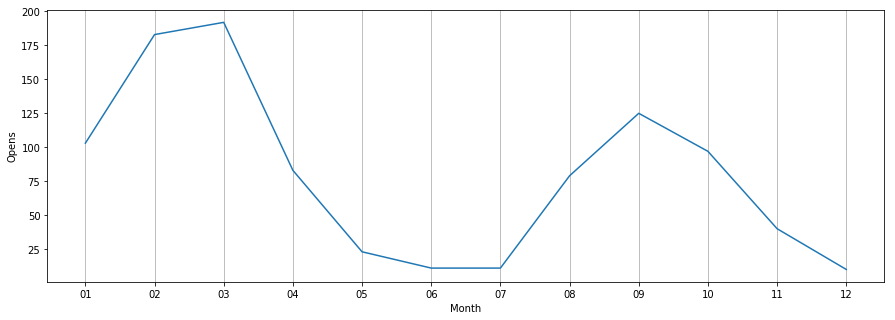

In [26]:
monthly = data.groupby(['Year Created','Month Created']).size().to_frame('Opens').reset_index()
x = monthly['Month Created']
y = monthly['Opens']
print(monthly)
plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.xticks(np.arange(0, 12, 1))
plt.xlabel('Month')
plt.ylabel('Opens')
plt.grid(axis='x')

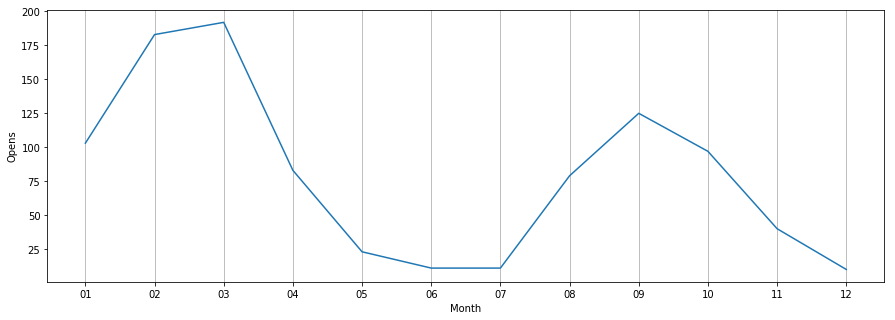

In [18]:
x = monthly['Month Created']
y = monthly['Opens']

plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.xticks(np.arange(0, 12, 1))
plt.xlabel('Month')
plt.ylabel('Opens')
plt.grid(axis='x')

In [106]:
# Getting signup count by referral method

referral_counts = data['Referral'].value_counts()
pd.DataFrame(referral_counts)

,Referral
Information booth on campus,281
Friend,236
Emails,229
Other,56
Classroom presentation,48
Search engine,34
Facebook,20
Event,18
Instagram,8
WeChat,8


Text(0,0.5,'Signups')

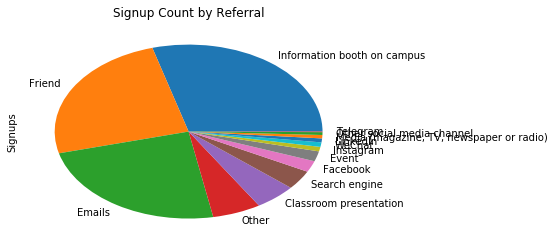

In [114]:
# Plotting signup count by referral method

referrals_plot = referral_counts.plot(kind='pie')
referrals_plot.set_title('Signup Count by Referral')
referrals_plot.set_ylabel('Signups')

In [94]:
# Getting signup count by month

signups_monthly = data['Month Created'].value_counts(sort=False).reindex(np.flipud(pd.unique(data['Month Created'])))
pd.DataFrame(signups_monthly)

,Month Created
01,103
02,183
03,192
04,83
05,23
06,11
07,11
08,79
09,125
10,97


Text(0,0.5,'Signups')

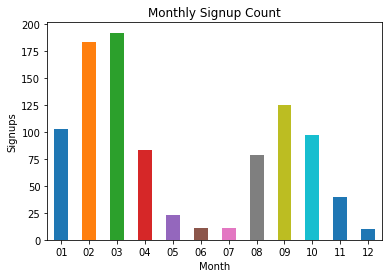

In [99]:
# Plotting signup count by month

signups_plot = signups_monthly.plot(kind='bar')
signups_plot.set_title('Monthly Signup Count')
signups_plot.set_xticklabels(signups_plot.get_xticklabels(), rotation=0, ha="center")
signups_plot.set_xlabel('Month')
signups_plot.set_ylabel('Signups')

In [103]:
status_counts = pd.DataFrame(data['Status'].value_counts(sort=False))
status_counts

,Status
completed,7
other,61
accepted,15
open,766
realized,8
applied,96
approved,4


## Programme Statistics

### No programme interest

In [ ]:
data_programmes = data
data_programmes = data_programmes.fillna(value=str(0))

k=0
for i in range(len(data)):
    if '0' in data_programmes['Interested'][i]:
        data_programmes = data_programmes.drop([i], axis=0)
        k+=1
        
data_programmes = data_programmes.reset_index(drop=True)

In [ ]:
l = len(data)
percentage_nointerest = np.round(k/l*100, decimals=1)
print(k, 'out of', l, 'accounts', '(', percentage_nointerest, '% )', 'did not indicate any programme interest.')

### OGV

#### This method of leads assignment is assumed:
1. As long as EP indicates interest in GV, lead goes to oGV (regardless of any other programmes selected)
2. Otherwise, lead goes to oGT

In [ ]:
OGV = data_programmes

for i in range(len(data_programmes)):
    if 'GV' not in OGV['Interested'][i]:
        OGV = OGV.drop([i], axis=0)

OGV = OGV.reset_index(drop=True)
OGV

#### Process Statistics
Where did OGV's leads come from?

Where did OGV's leads come from?

In [ ]:
ogv_referral_counts = pd.DataFrame(OGV.groupby(['Year_Created','Month_Created'])['Referral'].value_counts())
ogv_process_statistics = ogv_referral_counts.unstack(fill_value=0)
ogv_process_statistics = ogv_process_statistics.astype(int)
ogv_process_statistics

#### Status Statistics
What are the statuses of OGV's accounts?

In [ ]:
ogv_status_counts = pd.DataFrame(OGV.groupby(['Year_Created','Month_Created'])['Status'].value_counts())
ogv_statuses = ogv_status_counts.unstack(fill_value=0)
ogv_statuses = ogv_statuses.astype(int)
ogv_statuses

#### Contact Info Statistics
How many OGV accounts are more difficult to contact as they did not provide their phone numbers?

In [ ]:
v=0
for i in range(len(OGV)):
    if type(OGV['Phone'][i]) == str:
        v+=1

percentage_nonumber_ogv = np.round(v/len(OGV)*100, decimals=1)
print(v, 'out of', len(OGV), 'accounts', '(', percentage_nonumber_ogv, '% )', 'did not provide their phone number.')

#### Exporting the Data

In [ ]:
ogv_writer = pd.ExcelWriter('ogt_analytics.xlsx', engine='xlsxwriter')
ogv_process_statistics.to_excel(ogv_writer, sheet_name='process statistics')
ogv_statuses.to_excel(ogv_writer, sheet_name='status')
#ogv_writer.save()

### OGT

In [ ]:
OGT = data_programmes

for i in range(len(data_programmes)):
    if 'GV' in OGT['Interested'][i]:
        OGT = OGT.drop([i], axis=0)

OGT = OGT.reset_index(drop=True)
OGT

#### Process Statistics
Where did OGT's leads come from?

In [ ]:
ogt_referral_counts = pd.DataFrame(OGT.groupby(['Year_Created','Month_Created'])['Referral'].value_counts())
ogt_process_statistics = ogt_referral_counts.unstack(fill_value=0)
ogt_process_statistics = ogt_process_statistics.astype(int)
ogt_process_statistics

#### Status Statistics
What are the statuses of OGT's accounts?

In [ ]:
ogt_status_counts = pd.DataFrame(OGT.groupby(['Year_Created','Month_Created'])['Status'].value_counts())
ogt_statuses = ogt_status_counts.unstack(fill_value=0)
ogt_statuses = ogt_statuses.astype(int)
ogt_statuses

In [ ]:
ogtt = pd.DataFrame(OGT.groupby(['Year_Created','Month_Created'])['Status'].value_counts()).sum()
ogtt

#### Contact Info Statistics
How many OGT accounts are more difficult to contact as they did not provide their phone numbers?

In [ ]:
t=0
for i in range(len(OGT)):
    if type(OGT['Phone'][i]) == str:
        t+=1

percentage_nonumber_ogt = np.round(t/len(OGT)*100, decimals=1)
print(t, 'out of', len(OGT), 'accounts', '(', percentage_nonumber_ogt, '% )', 'did not provide their phone number.')

#### Exporting the Data

In [ ]:
ogt_writer = pd.ExcelWriter('ogt_analytics.xlsx', engine='xlsxwriter')
ogt_process_statistics.to_excel(ogt_writer, sheet_name='process statistics')
ogt_statuses.to_excel(ogt_writer, sheet_name='status')
#ogt_writer.save()